In [1]:
library("tidyverse")
library("lubridate")
library("ggplot2")
library("forcats")

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 2.2.1     √ purrr   0.2.4
√ tibble  1.4.2     √ dplyr   0.7.4
√ tidyr   0.7.2     √ stringr 1.2.0
√ readr   1.1.1     √ forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [2]:
log <- read_tsv('data/log.tsv', col_types = cols(action_type= col_factor(c("1","2","3"))))
events <- read_tsv('data/events.tsv')
users <- read_tsv('data/users.tsv')

Parsed with column specification:
cols(
  event_id = col_integer(),
  female_age_lower = col_integer(),
  female_age_upper = col_double(),
  male_age_lower = col_integer(),
  male_age_upper = col_double(),
  event_start_at = col_datetime(format = ""),
  prefecture = col_character(),
  first_published_at = col_character(),
  female_price = col_double(),
  male_price = col_double(),
  interest = col_character()
)
Parsed with column specification:
cols(
  user_id = col_integer(),
  age = col_integer(),
  gender = col_character(),
  prefecture = col_character(),
  created_on = col_date(format = "")
)


In [3]:
head(log,5)
head(events,5)
head(users,5)

user_id,event_id,time_stamp,action_type,num_of_people,payment_method,total_price
1,6261,2015-03-19 09:15:50,3,1,クレカ,4000
1,127600,2017-06-05 12:33:17,1,NA,NA,NA
1,127600,2017-06-05 12:37:09,1,NA,NA,NA
1,125296,2017-06-06 14:01:27,1,NA,NA,NA
1,125128,2017-06-06 14:03:57,1,NA,NA,NA


event_id,female_age_lower,female_age_upper,male_age_lower,male_age_upper,event_start_at,prefecture,first_published_at,female_price,male_price,interest
1,20,99,25,44,2015-03-08 18:00:00,宮城県,NA,1500,5000,NA
2,30,99,30,49,2015-03-01 15:00:00,富山県,NA,1000,6500,NA
3,22,99,24,39,2015-03-07 19:00:00,富山県,NA,1000,6000,NA
4,20,99,25,44,2015-03-08 18:00:00,新潟県,NA,1000,6000,NA
5,20,99,20,39,2015-03-14 19:00:00,新潟県,NA,1000,6000,NA


user_id,age,gender,prefecture,created_on
1,34,女性,静岡県,2012-06-26
2,31,男性,鳥取県,2012-07-12
3,32,男性,東京都,2012-07-15
4,30,男性,東京都,2012-07-17
5,29,女性,埼玉県,2012-07-17


In [4]:
log <- log %>% 
    mutate(year = year(time_stamp)) %>% 
    mutate(month= month(time_stamp)) %>% 
    mutate(day = day(time_stamp)) %>% 
    mutate(hour = hour(time_stamp))
head(log,5)

user_id,event_id,time_stamp,action_type,num_of_people,payment_method,total_price,year,month,day,hour
1,6261,2015-03-19 09:15:50,3,1,クレカ,4000,2015,3,19,9
1,127600,2017-06-05 12:33:17,1,NA,NA,NA,2017,6,5,12
1,127600,2017-06-05 12:37:09,1,NA,NA,NA,2017,6,5,12
1,125296,2017-06-06 14:01:27,1,NA,NA,NA,2017,6,6,14
1,125128,2017-06-06 14:03:57,1,NA,NA,NA,2017,6,6,14


In [5]:
summary(log)

    user_id         event_id        time_stamp                  action_type
 Min.   :    1   Min.   :     1   Min.   :2014-11-20 22:18:16   1:843212   
 1st Qu.:12739   1st Qu.:102591   1st Qu.:2017-03-26 13:22:59   2:354822   
 Median :26810   Median :119801   Median :2017-05-27 22:41:34   3:254055   
 Mean   :31749   Mean   :114832   Mean   :2017-04-26 22:20:40              
 3rd Qu.:51836   3rd Qu.:138939   3rd Qu.:2017-07-23 21:28:05              
 Max.   :70000   Max.   :158392   Max.   :2017-09-23 21:59:43              
                                                                           
 num_of_people     payment_method      total_price           year     
 Min.   :0.0       Length:1452089     Min.   :    0     Min.   :2014  
 1st Qu.:1.0       Class :character   1st Qu.: 4000     1st Qu.:2017  
 Median :1.0       Mode  :character   Median : 6000     Median :2017  
 Mean   :1.4                          Mean   : 6809     Mean   :2017  
 3rd Qu.:2.0                         

In [6]:
log %>%
    group_by(action_type) %>%
    count()

action_type,n
1,843212
2,354822
3,254055


In [7]:
events %>%
    group_by(interest) %>%
    count()

interest,n
アニメコン,977
サバコン,185
スポーツコン,1100
その他,11182
その他（スポーツコン）,745
テニスコン,222
フットサルコン,602
ボルダリングコン,420
婚活バスツアー（お見合いバスツアー）,59
釣りコン,5


In [8]:
nested_log <- log %>%
    group_by(action_type) %>%
    nest()

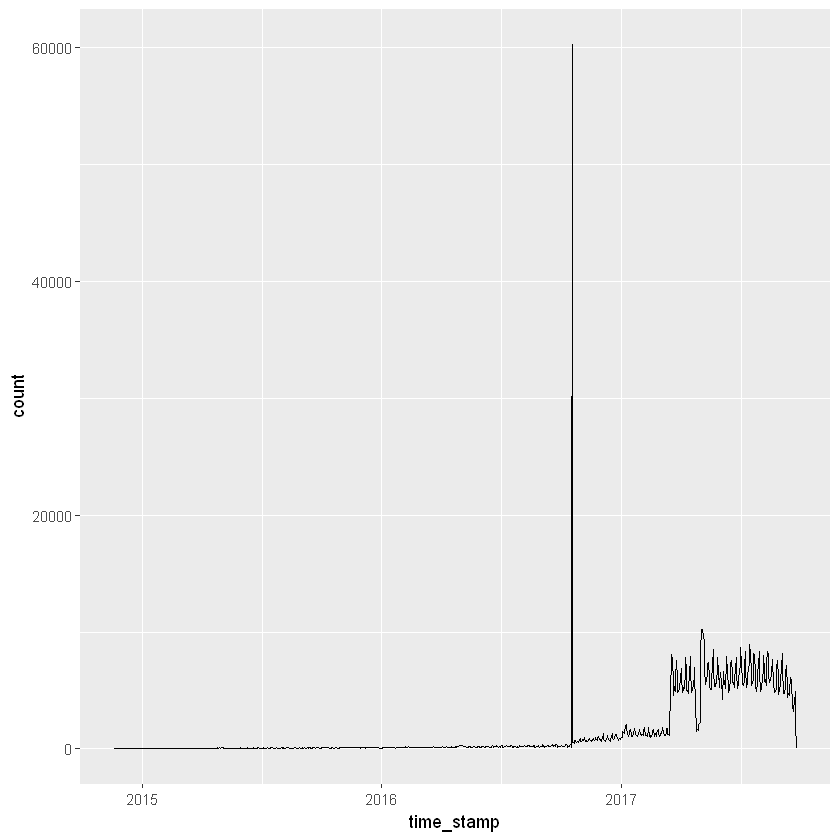

In [9]:
log %>%
    ggplot(aes(time_stamp)) +
    geom_freqpoly(binwidth = 86400)

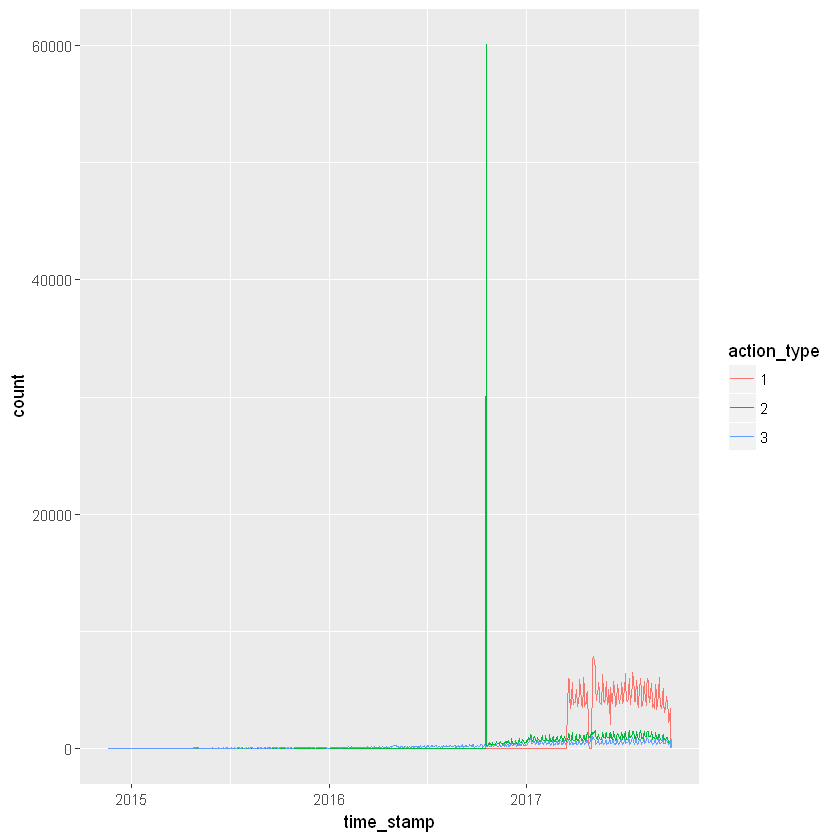

In [10]:
log %>%
    ggplot(aes(x = time_stamp, colour= action_type)) +
    geom_freqpoly(binwidth = 86400)